# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP AT SPARKS FOUNDATION  

# BY: AVINASH GONDELA

# THIS MODEL IS USED TO PREDICT PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS! DO ENJOY!!

In [2]:
#importing the necessary libraries for the task
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
#obtaining the data
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [4]:
#viewing the first ten elements of the data frame
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#viewing the last ten elements of the data frame
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Let us do some basic data analysis!

In [7]:
#This gives some information about the types of values present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Now Let us do some Data Visualisation using seaborn!

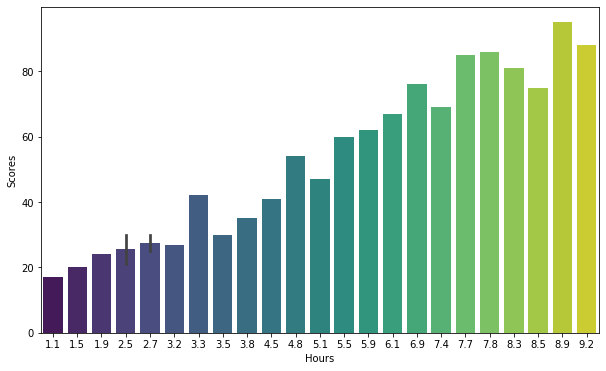

In [10]:
#Plotting a bar plot between Hours and Scores!
plt.figure(figsize=(10,6))
sns.barplot(x="Hours",y="Scores",data=df,palette='viridis')

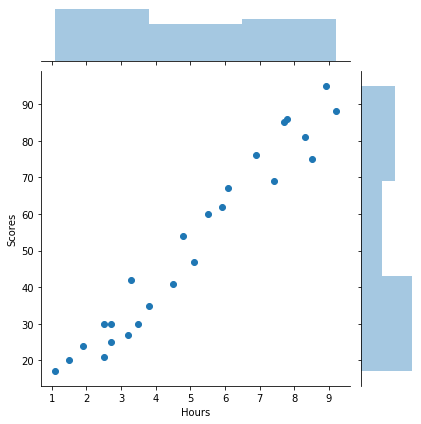

In [11]:
#Plotting a joint plot between Hours and Scores!
sns.jointplot(x="Hours",y='Scores',data=df,)

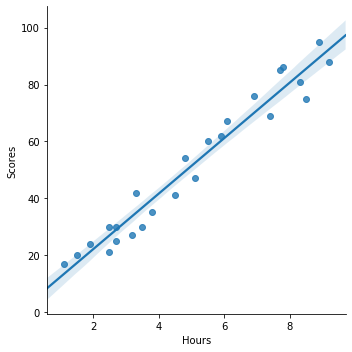

In [12]:
#This shows the linearity of the dataframe, hence we can use linear regression!
sns.lmplot(x='Hours',y='Scores',data=df)

# Preparing the model for training!

In [13]:
#Taking the value of X and y from the data frame provided!
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#preparing the training and testing data!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#Importing the linear regression model!
from sklearn.linear_model import LinearRegression

In [17]:
#Creating an instance of LinearRegression()!
lm=LinearRegression()

In [18]:
#Training the data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#Printing the score of our model for training data!
lm.score(X_train,y_train)*100

96.62064488954938

In [21]:
#Taking some predictions from the model we just trained!
predictions=lm.predict(X_test)

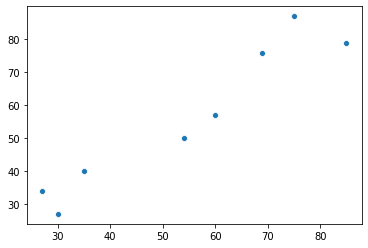

In [22]:
#Plotting a scatter plot between test values and the predictions obtained!
sns.scatterplot(y_test,predictions)

In [23]:
#Creating a dataframe of the actual vs predicted scores obtained from our model!
df1=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df1

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


# Taking any case to predict the score based on the number of study hours!

In [24]:
hours=float(input("Enter number of hours a student studies per day"))

Enter number of hours a student studies per day9.25


In [25]:
sp_pred=lm.predict([[hours]])
print('Number of hours is: {}'.format(hours))
print('For {} hours, Predicted scores is: {} '.format(hours,sp_pred) )

Number of hours is: 9.25
For 9.25 hours, Predicted scores is: [94.29276126] 


# Now let's see how well our model performed by evaluating the metrics!

In [26]:
from sklearn import metrics

In [27]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


# THANK YOU!